In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
df = pd.read_csv(r"C:\Users\Pallavi.Mangal\Downloads\archive (11)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [119]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [120]:
data = df.copy()

In [121]:
data.shape

(7043, 21)

In [122]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [123]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [124]:
data['SeniorCitizen']=data['SeniorCitizen'].astype(object)

In [125]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [126]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Handling Missing Values

In [127]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [128]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace = True)

In [129]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Univariate of Numerical Features

In [130]:
data.describe(percentiles=[0.01,0.05,0.1,0.25,0.50,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
tenure,7043.0,32.371149,24.559481,0.00,1.0,1.00,2.00,9.000,29.00,55.00,69.00,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.2,19.65,20.05,35.500,70.35,89.85,102.60,114.729,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,19.9,49.65,84.61,402.225,1400.55,3786.60,5973.69,8039.256,8684.80


# Univariate of Cat Features

In [131]:
for i in data.columns:
    if (data[i].dtypes =='object') & (i!= 'customerID'):
        print(i)
        print(data[i].value_counts(normalize = True))
        print(" ....................................... ")
        #print("\n")
    

gender
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
 ....................................... 
SeniorCitizen
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64
 ....................................... 
Partner
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
 ....................................... 
Dependents
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64
 ....................................... 
PhoneService
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64
 ....................................... 
MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64
 ....................................... 
InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64
 ....................................... 
OnlineSecurity
No                     0.496663
Yes               

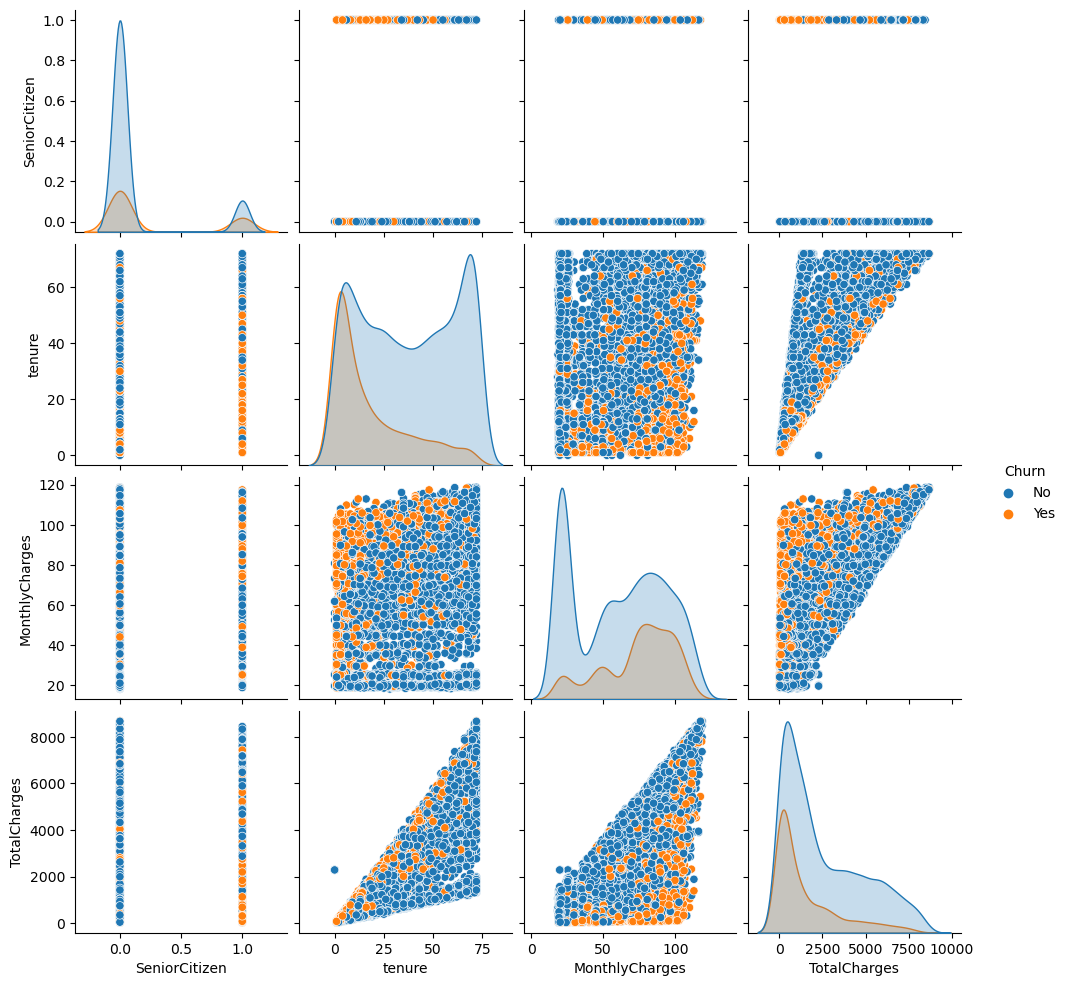

In [132]:
sns.pairplot(data,hue='Churn')

# Outlier using box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x299d8184ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x299d8185420>,
 'boxes': [<matplotlib.lines.Line2D at 0x299d8184c40>],
 'medians': [<matplotlib.lines.Line2D at 0x299d8185960>],
 'fliers': [<matplotlib.lines.Line2D at 0x299d8185c00>],
 'means': []}

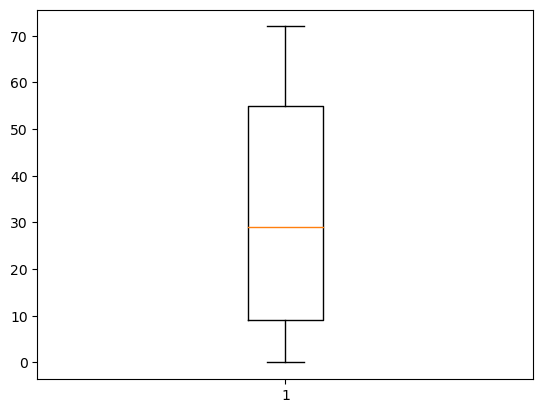

In [133]:
plt.boxplot(data['tenure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x299d81cfa30>,
 'caps': [<matplotlib.lines.Line2D at 0x299d81cfe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x299d81cf790>],
 'medians': [<matplotlib.lines.Line2D at 0x299d81fc3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x299d81fc670>],
 'means': []}

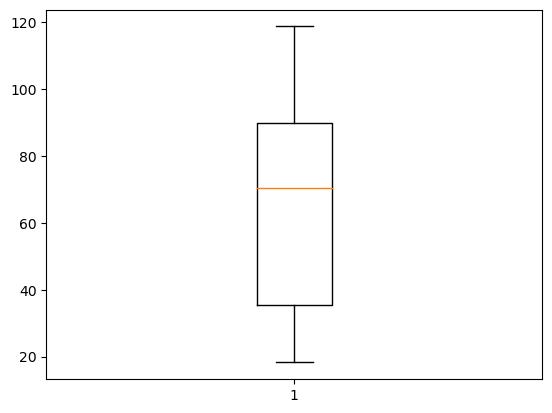

In [134]:
plt.boxplot(data['MonthlyCharges'])

{'whiskers': [<matplotlib.lines.Line2D at 0x299d824cf40>,
 'caps': [<matplotlib.lines.Line2D at 0x299d824d480>,
 'boxes': [<matplotlib.lines.Line2D at 0x299d824cca0>],
 'medians': [<matplotlib.lines.Line2D at 0x299d824d9c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x299d824dc60>],
 'means': []}

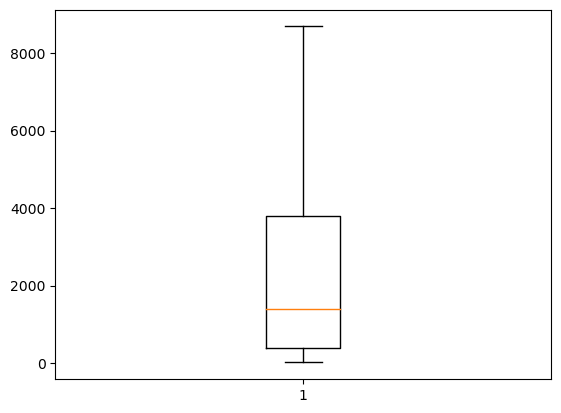

In [135]:
plt.boxplot(data['TotalCharges'])

# Bivariate analysis of Categorical Features

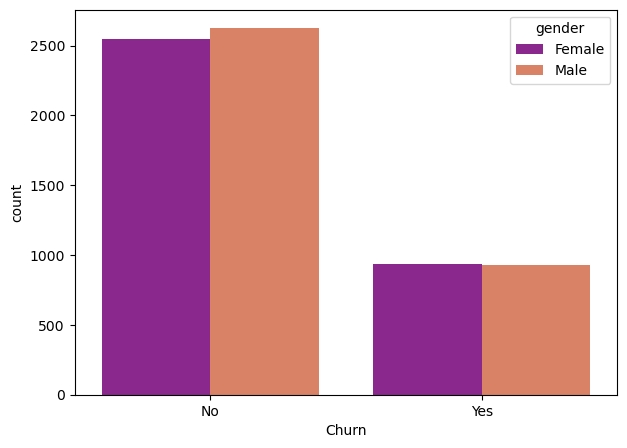

In [136]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='gender',data=data, palette='plasma' )
plt.show()

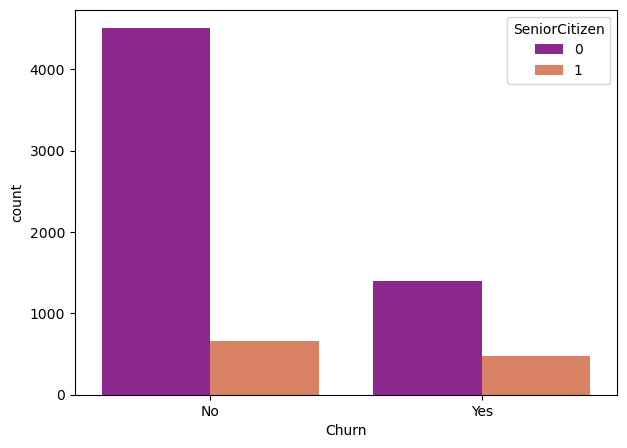

In [137]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='SeniorCitizen',data=data, palette='plasma' )
plt.show()

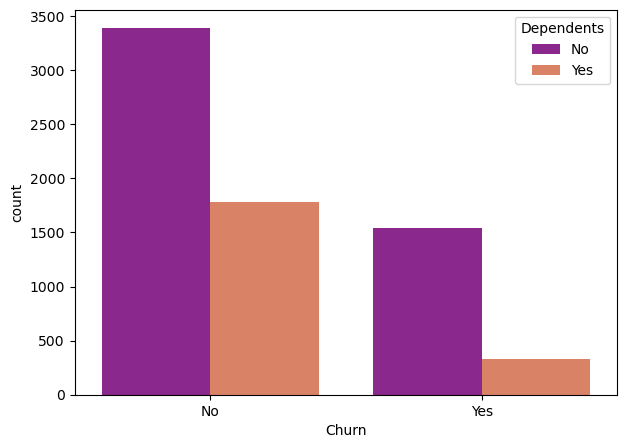

In [138]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='Dependents',data=data, palette='plasma' )
plt.show()

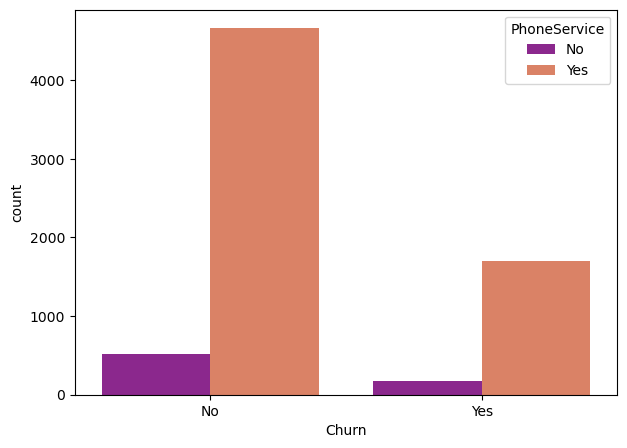

In [139]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='PhoneService',data=data, palette='plasma' )
plt.show()

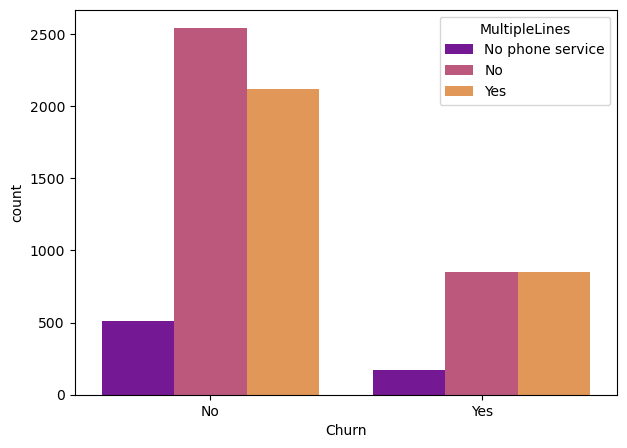

In [140]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='MultipleLines',data=data, palette='plasma' )
plt.show()

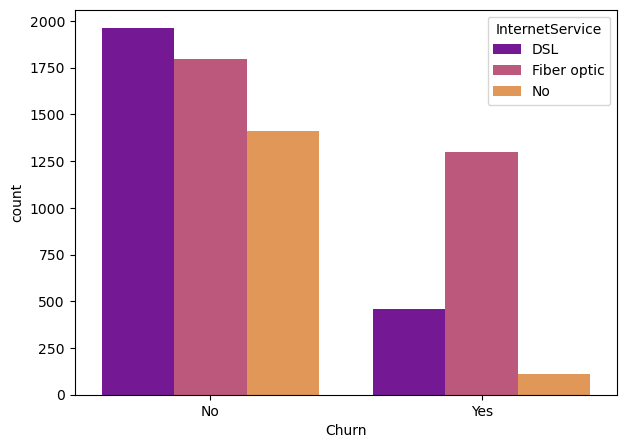

In [141]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='InternetService',data=data, palette='plasma' )
plt.show()

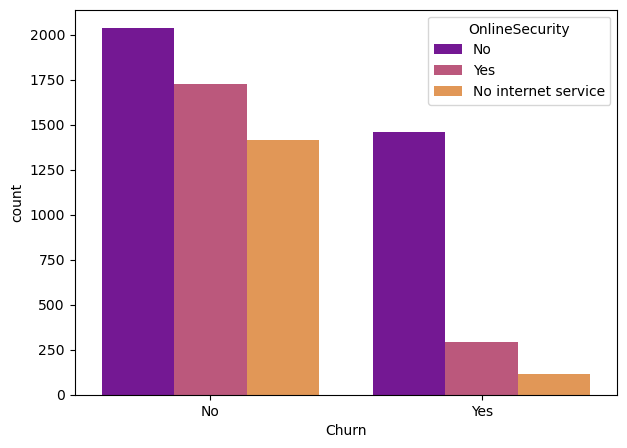

In [142]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='OnlineSecurity',data=data, palette='plasma' )
plt.show()

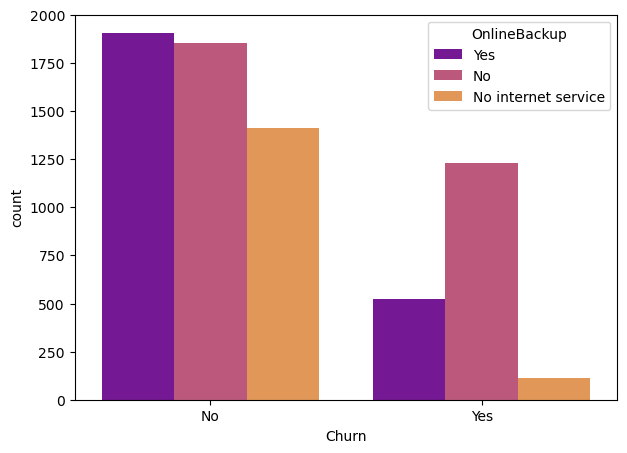

In [143]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='OnlineBackup',data=data, palette='plasma' )
plt.show()

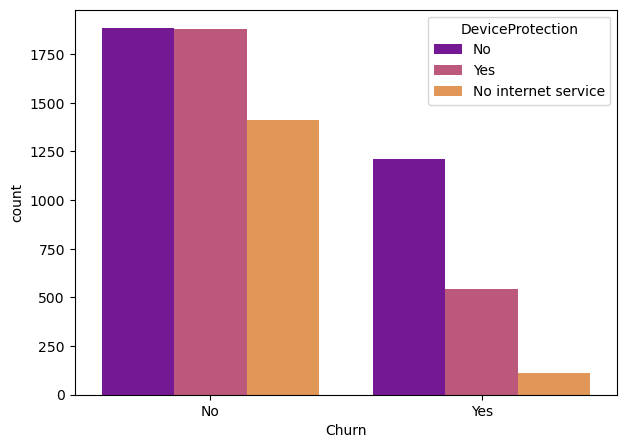

In [144]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='DeviceProtection',data=data, palette='plasma' )
plt.show()


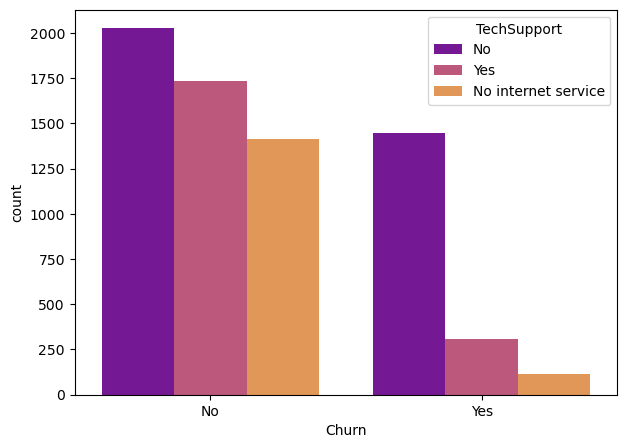

In [145]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='TechSupport',data=data, palette='plasma' )
plt.show()

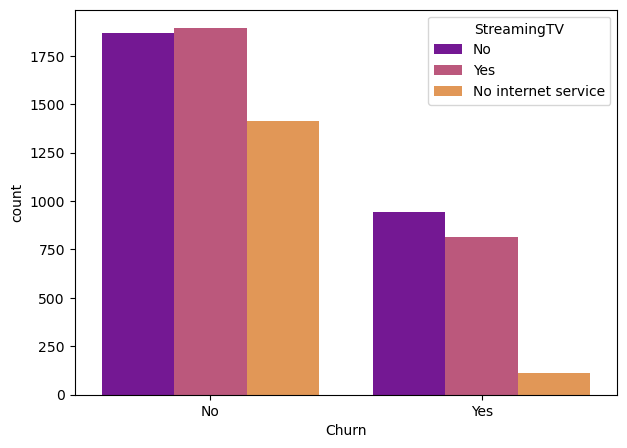

In [146]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='StreamingTV',data=data, palette='plasma' )
plt.show()

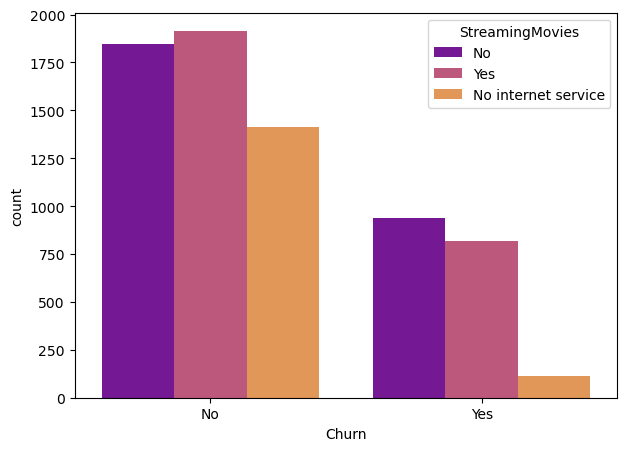

In [147]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='StreamingMovies',data=data, palette='plasma' )
plt.show()

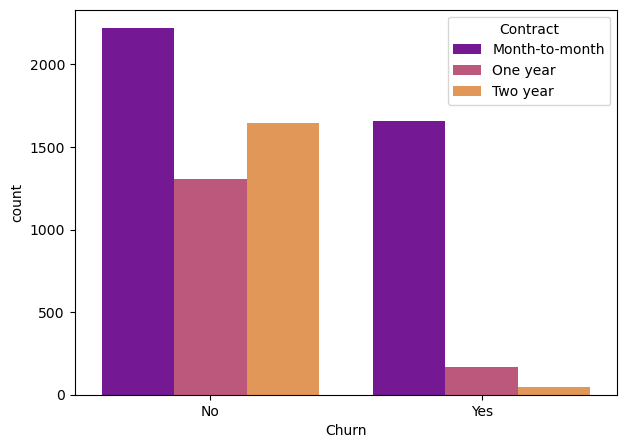

In [148]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='Contract',data=data, palette='plasma' )
plt.show()

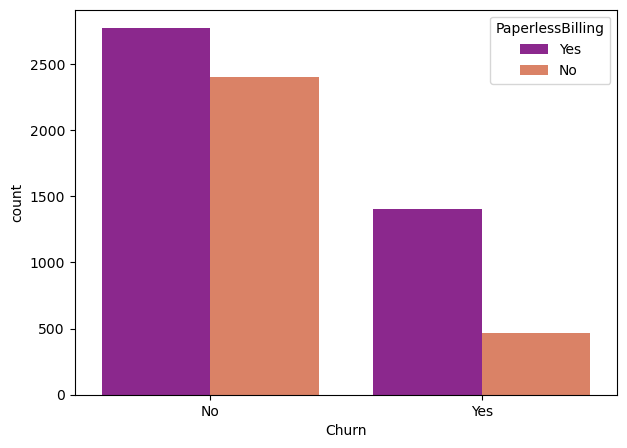

In [149]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='PaperlessBilling',data=data, palette='plasma' )
plt.show()

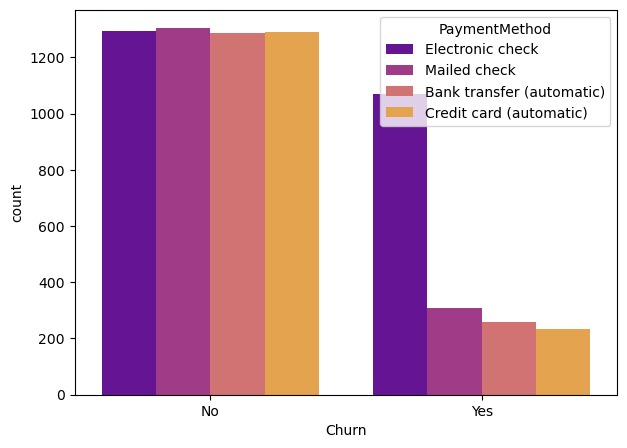

In [150]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Churn',hue ='PaymentMethod',data=data, palette='plasma' )
plt.show()

In [151]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# chi test for cat data

In [152]:
from scipy.stats import chi2_contingency

In [153]:
for i in data.columns:
    if (data[i].dtypes=='object') & (i not in ['customerID','Churn']):
        chitable = pd.crosstab(data['Churn'],data[i])
        stats , p_value , dof, exp =chi2_contingency(chitable)
        print("p Value of" , i ,":", p_value)

p Value of gender : 0.48657873605618596
p Value of SeniorCitizen : 1.510066805092378e-36
p Value of Partner : 2.1399113440759935e-36
p Value of Dependents : 4.9249216612154196e-43
p Value of PhoneService : 0.3387825358066928
p Value of MultipleLines : 0.0034643829548773
p Value of InternetService : 9.571788222840544e-160
p Value of OnlineSecurity : 2.6611496351768565e-185
p Value of OnlineBackup : 2.0797592160865457e-131
p Value of DeviceProtection : 5.505219496457244e-122
p Value of TechSupport : 1.4430840279999813e-180
p Value of StreamingTV : 5.528994485739024e-82
p Value of StreamingMovies : 2.667756755723681e-82
p Value of Contract : 5.863038300673391e-258
p Value of PaperlessBilling : 4.073354668665985e-58
p Value of PaymentMethod : 3.6823546520097993e-140


In [ ]:
so by observing this , we can conclude , gender and phone service are not significantly important

# p values for cont feature

In [154]:
data1 = data[data['Churn']=='Yes']

In [155]:
data2=data[data['Churn']=='No']

In [156]:
from scipy.stats import mannwhitneyu

In [157]:
for i in data.columns:
    if data[i].dtypes!='object':
        stats , p_value = mannwhitneyu(data1[i],data2[i])
        print("p value of ", i ,":" , p_value)

p value of  tenure : 2.419635517951866e-208
p value of  MonthlyCharges : 3.311627651988585e-54
p value of  TotalCharges : 1.0852738885618543e-84


In [158]:
data.corr()

C:\Users\Pallavi.Mangal\AppData\Local\Temp\ipykernel_13616\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


C:\Users\Pallavi.Mangal\AppData\Local\Temp\ipykernel_13616\752556167.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='coolwarm')


<Axes: >

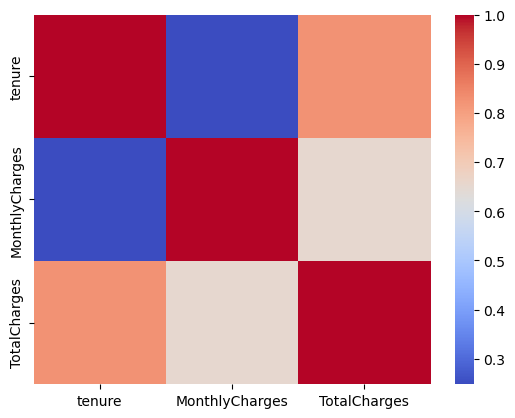

In [159]:
sns.heatmap(data.corr(),cmap='coolwarm')

# Converting variables for Modelling

In [160]:
from sklearn.preprocessing import LabelEncoder

In [161]:
le = LabelEncoder()

In [162]:
Dum_list=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
         'StreamingMovies','Contract','PaymentMethod']

In [163]:
data3 = pd.get_dummies(data, columns=Dum_list, drop_first=True)

In [164]:
data3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,56.95,1889.50,No,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No,42.30,1840.75,No,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,84.80,1990.50,No,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,103.20,7362.90,No,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,Yes,29.60,346.45,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,74.40,306.60,Yes,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [165]:
for i in data3.columns:
    if (data3[i].dtypes=='object') and (i!= 'customerID'):
        data3[i]=le.fit_transform(data[i])
    

In [166]:
data3.drop('customerID' , axis = 1 , inplace=True)

In [167]:
data3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [168]:
X = data3.drop(['gender','PhoneService','Churn'] , axis = 1)

In [169]:
y = data3.Churn

In [170]:
X

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,53.85,108.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,70.70,151.65,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,72,1,103.20,7362.90,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
7040,0,1,1,11,1,29.60,346.45,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7041,1,1,0,4,1,74.40,306.60,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [171]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# Base Modelling Building

In [173]:
from sklearn.model_selection import train_test_split,KFold,cross_val_predict,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,accuracy_score , confusion_matrix, precision_score, recall_score , f1_score

In [174]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('DT' , DecisionTreeClassifier()))
models.append(('KNN' ,KNeighborsClassifier()))
models.append(('SVM',SVC()))
models.append(('NB',GaussianNB()))
models.append(('RF',RandomForestClassifier()))
models.append(('XGB',XGBClassifier()))

In [177]:
# Cross validation

results=[]
names=[]
for name,model in models:
    kfold = KFold(n_splits=5,random_state=None)
    cv_score = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    results.append(cv_score)
    names.append(name)
    print(name , cv_score.mean())

C:\Users\Pallavi.Mangal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pallavi.Mangal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

LR 0.8036349119298019
DT 0.7238402477579198
KNN 0.761465054197045
SVM 0.7346286453964772
NB 0.6622151025872638
RF 0.7877314665462288
XGB 0.781911937866959


# Split the data

In [180]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state=18)

# Model Building - Logistic Regression

In [181]:
lr = LogisticRegression()


In [182]:
lr.fit(X_train ,y_train)

C:\Users\Pallavi.Mangal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [183]:
# prediction on test data
lr_pred=lr.predict(X_test)

In [184]:
print("confusion Matrix", confusion_matrix(y_test , lr_pred))
print("Accuracy ", accuracy_score(y_test , lr_pred))
print("Precision ", precision_score(y_test , lr_pred))
print("Recall ", recall_score(y_test , lr_pred))
print("F1 score ", f1_score(y_test , lr_pred))

confusion Matrix [[1395  178]
 [ 237  303]]
Accuracy  0.8035967818267865
Precision  0.6299376299376299
Recall  0.5611111111111111
F1 score  0.5935357492654262


# Hyper parameter tuning for Logistic Regression

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
param = {
    'C':[1,10,50],
    'solver':['newton-cg','lbfgs', 'liblinear','saga'],
    'max_iter':[75,100,200]
    
       
}

In [188]:
gsv = GridSearchCV(lr , param_grid=param , cv =3)

In [189]:
lr_gsv = gsv.fit(X_train , y_train)

C:\Users\Pallavi.Mangal\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Pallavi.Mangal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Pallavi.Mangal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Pallavi.Mangal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

In [190]:
lr_gsv.best_estimator_

LogisticRegression(C=1, max_iter=200)

In [191]:
lr_gsv.best_params_

{'C': 1, 'max_iter': 200, 'solver': 'lbfgs'}

In [192]:
lr_model = LogisticRegression(C=1, max_iter=200 , solver = 'lbfgs')

In [194]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=200)

In [195]:
# Prediction on training
lr_pred_train =lr_model.predict(X_train)

In [196]:
print(confusion_matrix(y_train , lr_pred_train))
print("Accuracy" , accuracy_score(y_train , lr_pred_train))
print("Precision " , precision_score(y_train , lr_pred_train))
print("Recall" , recall_score(y_train , lr_pred_train))
print("F1 score" , f1_score(y_train , lr_pred_train))

[[3239  362]
 [ 600  729]]
Accuracy 0.804868154158215
Precision  0.6681943171402384
Recall 0.5485327313769752
F1 score 0.6024793388429753


In [197]:
# Prediction on test data
lr_pred_test = lr_model.predict(X_test)

In [198]:
print(confusion_matrix(y_test , lr_pred_test))
print("Accuracy" , accuracy_score(y_test , lr_pred_test))
print("Precision " , precision_score(y_test , lr_pred_test))
print("Recall" , recall_score(y_test , lr_pred_test))
print("F1 score" , f1_score(y_test , lr_pred_test))

[[1400  173]
 [ 230  310]]
Accuracy 0.8092759110269758
Precision  0.6418219461697723
Recall 0.5740740740740741
F1 score 0.606060606060606


# Feature Importance

In [199]:
rf = RandomForestClassifier()

In [200]:
rf.fit(X_train , y_train)

RandomForestClassifier()

In [202]:
feat_imp = [(feature , imp) for feature , imp in zip(X,rf.feature_importances_)]

In [205]:
a =pd.DataFrame(feat_imp , columns = ['feature' , 'important']).sort_values('important' ,ascending = False)

In [206]:
a

,feature,important
6,TotalCharges,0.201269
5,MonthlyCharges,0.174948
3,tenure,0.169736
26,PaymentMethod_Electronic check,0.042385
9,InternetService_Fiber optic,0.041609
24,Contract_Two year,0.032631
4,PaperlessBilling,0.026145
12,OnlineSecurity_Yes,0.025036
18,TechSupport_Yes,0.024992
23,Contract_One year,0.023818


In [ ]:
so TotalCharges,MonthlyCharges, tenure are important key features.

# Model -Building XG Boost

In [207]:
xgb = XGBClassifier()

In [208]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [209]:
# prediction on test data
xgb_pred = xgb.predict(X_test)

In [210]:
print(confusion_matrix(y_test,xgb_pred))
print('accuracy:',accuracy_score(y_test,xgb_pred))
print('Precision:',precision_score(y_test,xgb_pred))
print('Recall:',recall_score(y_test,xgb_pred))
print('F1 score:',f1_score(y_test,xgb_pred))

[[1380  193]
 [ 243  297]]
accuracy: 0.7936583057264552
Precision: 0.6061224489795919
Recall: 0.55
F1 score: 0.5766990291262136


# Hyper parameter Tuning of XGBoost

In [211]:
params = {'learning_rate':[0.05,0.075,0.1],
          'max_depth':[4,5,6],
          'colsample_bytree':[0.7,0.8],
          'n_estimators':[75,100,125],
          'colsample_bylevel':[0.7,0.8]
    
    
}

In [213]:
grid = GridSearchCV(xgb , param_grid=params , cv= 5)

In [214]:
gsv_xgb=grid.fit(X_train , y_train)

In [215]:
gsv_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.075, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=75, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [216]:
gsv_xgb.best_params_

{'colsample_bylevel': 0.8,
 'colsample_bytree': 0.7,
 'learning_rate': 0.075,
 'max_depth': 4,
 'n_estimators': 75}

In [217]:
xgb_model = XGBClassifier(colsample_bylevel=0.8 ,colsample_bytree=0.7,learning_rate=0.075,max_depth=4,n_estimators=75)

In [218]:
xgb_model.fit(X_train ,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.075, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=75, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [219]:
# prediction on train
xgb_pred_train=xgb_model.predict(X_train)

In [220]:
print(confusion_matrix(y_train,xgb_pred_train))
print('accuracy:',accuracy_score(y_train,xgb_pred_train))
print('Precision:',precision_score(y_train,xgb_pred_train))
print('Recall:',recall_score(y_train,xgb_pred_train))
print('F1 score:',f1_score(y_train,xgb_pred_train))

[[3300  301]
 [ 592  737]]
accuracy: 0.8188640973630832
Precision: 0.710019267822736
Recall: 0.5545522949586155
F1 score: 0.6227291930713984


In [221]:
# Prediction on test
xgb_pred_test=xgb_model.predict(X_test)

In [222]:
print(confusion_matrix(y_test,xgb_pred_test))
print('accuracy:',accuracy_score(y_test,xgb_pred_test))
print('Precision:',precision_score(y_test,xgb_pred_test))
print('Recall:',recall_score(y_test,xgb_pred_test))
print('F1 score:',f1_score(y_test,xgb_pred_test))

[[1407  166]
 [ 240  300]]
accuracy: 0.8078561287269286
Precision: 0.6437768240343348
Recall: 0.5555555555555556
F1 score: 0.5964214711729623
